# Birds, dinosaurs, reptiles, and mammals (oh my)

We don't have data on cerebrum size for most organisms, but we can apply machine learning to body mass and brain volume values to classify organisms into birds, dinosaurs, reptiles, and mammals.

## Import libraries and data

Import the libraries you need to build a decision tree and read the bird_dino_gator.csv file into a dataframe. How many rows does the data have?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import pydotplus 
import collections
from sklearn import tree
df = pd.read_csv("bird_mammal_dino_reptile.csv")
df.head()

,Species Type,Genus,Species,Brain mass (g),Body mass (g)
0,M,Sciurus,aberti,6.850,626.5
1,M,Cynomops,abrasus,0.418,33.3
2,M,Myoprocta,acouchy,9.900,782.0
3,M,Rhinolophus,acuminatus,0.302,12.1
4,M,Lagenorhynchus,acutus,1200.000,120000.0


Convert the dataframe to a numpy array. (Note, we are not going to calculate a brain to body mass ratio here, we are just going to use these two values as our features for each species.)

In [3]:
array = df.to_numpy()

## Training/test data

We are going to split up our dataset into training data, that we will use to train the algorithm, and test data, that we will use to see how well the algorithm performs like we did with the k-nearest neighbors algorithm. From sklearn.model_selection, import train_test_split. Divide the data into 80% training and 20% test data:

In [4]:
y = array[:, 0]
x = array[:, 3:5]
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size= 0.2)
print(Y_test)

['B' 'M' 'B' ... 'B' 'B' 'M']


## Create decision tree

Create a decision tree classifier to classify the brains as birds, dinosaurs, or reptiles based on the brain to body mass ratio and cerebrum to whole brain ratio. Make sure to run your decision tree only on the training data (not the test data).

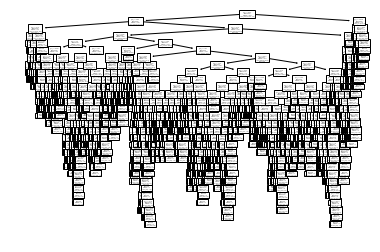

In [5]:
clf = tree.DecisionTreeClassifier()
fit = clf.fit(X_train,Y_train)
tree.plot_tree(decision_tree = fit, class_names= ["bird", "dino", "reptile", "mammal"])
plt.rcParams["figure.figsize"] = (200,100)

## Testing

We can evaluate our decision tree on our testing data.

In [6]:
clf.predict(X_test)

array(['B', 'B', 'B', ..., 'B', 'B', 'B'], dtype=object)

Calculate the accuracy of the decision tree by importing `metrics` from `sklearn` and then finding the accuracy score.

In [7]:
from sklearn import metrics 
metrics.accuracy_score(Y_test, clf.predict(X_test))

0.8136882129277566

## Beautification

If time permits, play around with changing the appearance of your decision tree and plotting a decision surface!

In [15]:
data_class_names = ["Bird", "Dino", "Reptile", "Mammal"]
data_feature_names = ["Brain Mass", "Body Mass"]
dot_data = tree.export_graphviz(clf, class_names=data_class_names, filled=True, 
                                feature_names = data_feature_names,
                                rounded=True, max_depth= 4, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)

colors = ('yellow', 'green', 'red', 'deepskyblue', 'purple')
edges = collections.defaultdict(list)

for edge in graph.get_edge_list():
    edges[edge.get_source()].append(int(edge.get_destination()))

for edge in edges:
    edges[edge].sort()    
    for i in range(2):
        dest = graph.get_node(str(edges[edge][i]))[0]
        dest.set_fillcolor(colors[i])

nodes = graph.get_node_list()
        
for node in nodes:
    if node.get_name() not in ('node', 'edge'):
        values = clf.tree_.value[int(node.get_name())][0]
        if max(values) == sum(values):    
            node.set_fillcolor(colors[np.argmax(values)])
        else:
            node.set_fillcolor(colors[-1])

graph.write_png('new_tree.png')

True

In [9]:
from sklearn import metrics 
metrics.accuracy_score(Y_test, clf.predict(X_test))

0.8152091254752851

## Decision Surface

In [ ]:
body_mass_min = min(df["Body mass (g)"])
body_mass_max = max(df["Body mass (g)"])
#print(B2B_min)
#print(B2B_max)
brain_mass_min = min(df["Brain mass (g)"])
brain_mass_max = max(df["Brain mass (g)"])
#print(C2B_min)
#print(C2B_max)

xx, yy = np.meshgrid(np.arange(body_mass_min - 0.05, body_mass_max + 0.05, 100),
                         np.arange(brain_mass_min - 0.05, brain_mass_max + 0.05, 100))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)
# label the axes


# Plot the training points
for i, color in zip(range(4), "ryb"):
    idx = np.where(y == i)
    plt.scatter(x[idx, 0], x[idx, 1], c=color, label=["Bird", "Dino", "Reptile", "Mammal"][i],
                cmap=plt.cm.RdYlBu, edgecolor='black', s=15)

#ax.set_xlim(xx.min(), xx.max())
#ax.set_ylim(yy.min(), yy.max())
#ax.set_xticks(())

plt.legend()
plt.show() 